## Name : Abdelrahman Yousef Adnan
## Date : 23/7/2019


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bank-full.csv",sep = ';')
df_copy = df.copy()

In [3]:
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
print(df['job'].unique())
print(df['marital'].unique())
print(df['education'].unique())
print(df['default'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['contact'].unique())
print(df['month'].unique())
print(df['poutcome'].unique())
print(df['y'].unique())


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown' 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


# Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
obj_cols=[]
for i in df.columns:
    if df[i].dtype == "object":
        obj_cols.append(i)
print(obj_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [9]:
job_labels= LabelEncoder()
marital_labels = LabelEncoder()
education_labels = LabelEncoder()
default_labels = LabelEncoder()
housing_labels = LabelEncoder()
loan_labels = LabelEncoder()
contact_labels = LabelEncoder()
month_labels = LabelEncoder()
poutcome_labels = LabelEncoder()
y_labels = LabelEncoder()

In [10]:
df['job']       =job_labels.fit_transform(df['job'])
df['marital']   =marital_labels.fit_transform(df['marital'])
df['education'] =education_labels.fit_transform(df['education'])
df['default']   =default_labels.fit_transform(df['default'])
df['housing']   =housing_labels.fit_transform(df['housing'])
df['loan']      =loan_labels.fit_transform(df['loan'])
df['contact']   =contact_labels.fit_transform(df['contact'])
df['month']     =month_labels.fit_transform(df['month'])
df['poutcome']  =poutcome_labels.fit_transform(df['poutcome'])
df['y']         =y_labels.fit_transform(df['y'])

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [12]:
df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
from sklearn.preprocessing import StandardScaler

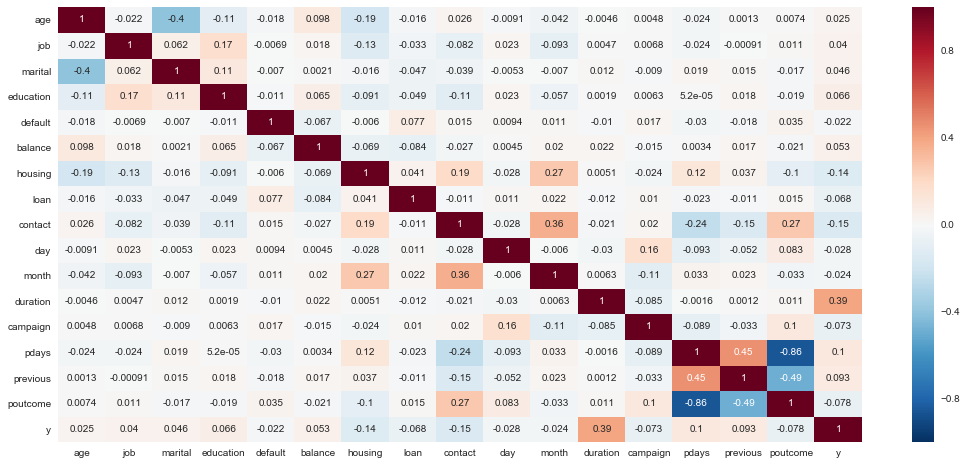

In [14]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True);

In [15]:

# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 16].values

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train

array([[-0.18276354,  0.8126559 , -0.27425642, ..., -0.41131336,
        -0.23906547,  0.44528559],
       [-0.93754659, -0.10571912,  1.36673296, ..., -0.41131336,
        -0.23906547,  0.44528559],
       [-0.46580719, -1.33021913,  1.36673296, ..., -0.41131336,
        -0.23906547,  0.44528559],
       ..., 
       [-0.56015507, -0.10571912, -0.27425642, ..., -0.41131336,
        -0.23906547,  0.44528559],
       [ 2.74202077,  0.20040589, -0.27425642, ...,  1.41471736,
         0.1692061 , -2.57889863],
       [ 0.47767162, -1.02409413,  1.36673296, ..., -0.41131336,
        -0.23906547,  0.44528559]])

In [18]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [21]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [22]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [23]:
cm

array([[9237,  741],
       [ 713,  612]])

In [25]:
accuracy_score(y_test, y_pred)

0.87136158541980002

In [46]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [47]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [48]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[9665,  313],
       [ 803,  522]])

In [50]:
accuracy_score(y_test, y_pred)

0.90126515084490844

In [52]:

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())


0.902619350754
0.00300251696824


In [53]:

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 20, 30, 50,70,100,150], 'criterion': ['entropy']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [54]:
print(best_accuracy)
print(best_parameters)

0.905685973811
{'criterion': 'entropy', 'n_estimators': 150}
